# Testing Cloud Dev Env

In [2]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-05-21 11:10:46.489537: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 11:10:48.912854: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 11:10:51.890960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 11:10:53.520731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# MNIST dataset loading and training
dataset = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


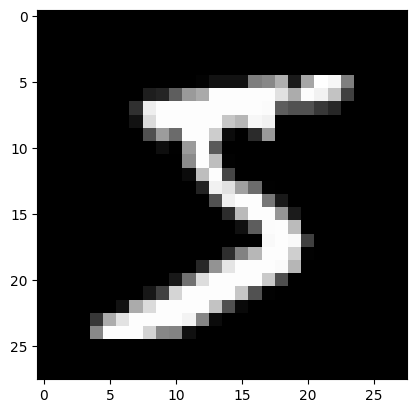

In [5]:
# display one image
plt.imshow(x_train[0], cmap='gray')

In [6]:
# model generating
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/Ash/.local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# using adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# training
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7905 - loss: 6.7022
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9029 - loss: 0.3785
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9284 - loss: 0.2732
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9394 - loss: 0.2317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9447 - loss: 0.2067
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9478 - loss: 0.2004
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9481 - loss: 0.1978
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9531 - loss: 0.1891
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9541 - loss: 0.1799
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9564 - loss: 0.1689


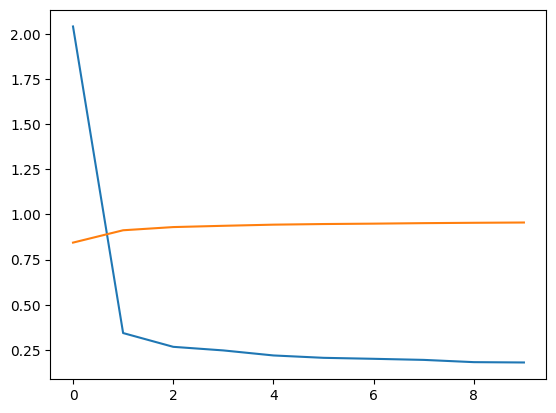

In [9]:
# plotting loss and accurace
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.show()

## Questions on Model Training
Relation between loss and accuracy?
And relation between different loss sizes - how they represent different signals?

Does scaling change things?
Hmm

    ## Available GPUs
gcloud compute accelerator-types list --zone=us-central1-a

## GPU Things
gcloud compute instances stop test-instance --zone=INSTANCE_ZONE
gcloud compute instances update INSTANCE_NAME --zone=INSTANCE_ZONE --accelerator type=nvidia-tesla-k80,count=1
gcloud compute instances start INSTANCE_NAME --zone=INSTANCE_ZONE

In [10]:
# enabling GPU, training again and turning off GPU
# running GPU enabling in shell